图像数据形状和对应数据为: (28, 28)
图像标签形状和对应数据为: (28, 28) [5]

打印第一个batch的第一个图像，对应标签的数字为[5]


<Figure size 640x480 with 0 Axes>

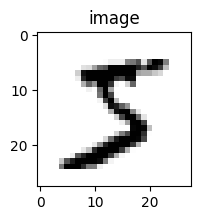

In [2]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
train_dataset = paddle.vision.datasets.MNIST(mode='train')
train_data_0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])
import matplotlib.pyplot as plt
plt.figure("Image")
plt.figure(figsize=(2,2))
plt.imshow(train_data_0,cmap=plt.cm.binary)
plt.axis('on')
plt.title('image')
plt.show
print("图像数据形状和对应数据为:",train_data_0.shape)
print("图像标签形状和对应数据为:",train_data_0.shape,train_label_0)
print("\n打印第一个batch的第一个图像，对应标签的数字为{}".format(train_label_0))

In [3]:
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST,self).__init__()
        self.fc = paddle.nn.Linear(in_features=784,out_features=1)
    def forward(self,inputs):
        outputs =self.fc(inputs)
        return outputs
model = MNIST()
def train(model):
    model.train()
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'),
                                        batch_size=16,
                                        shuffle=True)
    opt = paddle.optimizer.SGD(learning_rate=0.001,parameters=model.parameters())
def norm_img(img):
    assert len(img.shape)==3
    batch_size,img_h,img_w=img.shape[0],img.shape[1],img.shape[2]
    img=img/255
    img=paddle.reshape(img,[batch_size,img_h*img_w])
    return img

In [5]:
import paddle
paddle.vision.set_image_backend('cv2')
model=MNIST()
def train(model):
    model.train()
    train_loder=paddle.io.DateLoader(paddle.vision.datasets.MNIST(mode='train'),
                                     batch_size=16,
                                     shuffle=True)
    opt=paddle.optimizer.SGD(learning_rate=0.001,parameters=model.parameters())
    EPOCH_NUM=10
    loss_list=[]
    for epoch in range(EPOCH_NUM):
        for batch_id,date in enumerate(train_loder()):
            image=norm_img(data[0]).astype('float32')
            labels=data[1].astype('float32')
            predicts=model(images)
            loss=F.square_error_cost(predicts,labels)
            avg_loss=paddle.mean(loss)
            if batch_id % 1000 == 0:
                loss =avg_loss.numpy()[0]
                loss_list.append(loss)
                print("epoch_id:{},batch_id:{},los is:{}".format(epoch,batch_id,loss))
                avg_loss.backward()
                opt.step()
                opt.clear_grad()
    return loss_list
loss_list=train(model)
paddle.save(model.state_dict(),'d:/.work/school/deep learn/mnist.pdparams')
def plot(loss_list):
    plt.figure(figsize=(10,5))
    freqs = [i for i in range(len(loss_list))]
    plt.plot(freqs,loss_list,color='#e4007f',label="Train loss")
    plt.ylabel("loss",fontsize='large')
    plt.xlabel("freq",fontsize='large')
    plt.legend(loc='upper right',fontsize='x-large')
    
    plt.show()
plot(loss_list)

AttributeError: module 'paddle.io' has no attribute 'DateLoader'

In [ ]:
# import paddle
# import paddle.vision as vision
# import matplotlib.pyplot as plt

# paddle.vision.set_image_backend('cv2')

# # Define the LeNet model
# class LeNet(paddle.nn.Layer):
#     def __init__(self, num_classes=10):
#         super(LeNet, self).__init__()
#         self.conv1 = paddle.nn.Conv2D(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.pool1 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
#         self.conv2 = paddle.nn.Conv2D(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.pool2 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
#         self.fc1 = paddle.nn.Linear(in_features=64*7*7, out_features=128)
#         self.fc2 = paddle.nn.Linear(in_features=128, out_features=num_classes)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = paddle.nn.functional.relu(x)
#         x = self.pool1(x)
#         x = self.conv2(x)
#         x = paddle.nn.functional.relu(x)
#         x = self.pool2(x)
#         x = paddle.flatten(x, start_axis=1)
#         x = self.fc1(x)
#         x = paddle.nn.functional.relu(x)
#         x = self.fc2(x)
#         return x

# def train(model):
#     model.train()
#     train_loader = paddle.io.DataLoader(vision.datasets.MNIST(mode='train'),
#                                          batch_size=16,
#                                          shuffle=True)
#     opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
#     EPOCH_NUM = 10
#     loss_list = []

#     for epoch in range(EPOCH_NUM):
#         for batch_id, data in enumerate(train_loader()):
#             images = paddle.to_tensor(data[0].astype('float32'))
#             labels = paddle.to_tensor(data[1].astype('int64'))

#             predicts = model(images)
#             loss = paddle.nn.functional.cross_entropy(predicts, labels)
#             avg_loss = paddle.mean(loss)

#             if batch_id % 1000 == 0:
#                 loss_val = avg_loss.numpy()[0]
#                 loss_list.append(loss_val)
#                 print("epoch_id:{}, batch_id:{}, loss is:{}".format(epoch, batch_id, loss_val))

#             avg_loss.backward()
#             opt.step()
#             opt.clear_grad()

#     return loss_list

# # Initialize the LeNet model
# model = LeNet()

# # Train the model and get the loss_list
# loss_list = train(model)

# # Save the trained model
# paddle.save(model.state_dict(), 'd:/.work/school/deep learn/mnist.pdparams')

# # Plot the training loss
# def plot(loss_list):
#     plt.figure(figsize=(10, 5))
#     freqs = [i for i in range(len(loss_list))]
#     plt.plot(freqs, loss_list, color='#e4007f', label="Train loss")
#     plt.ylabel("loss", fontsize='large')
#     plt.xlabel("freq", fontsize='large')
#     plt.legend(loc='upper right', fontsize='x-large')
#     plt.show()

# plot(loss_list)


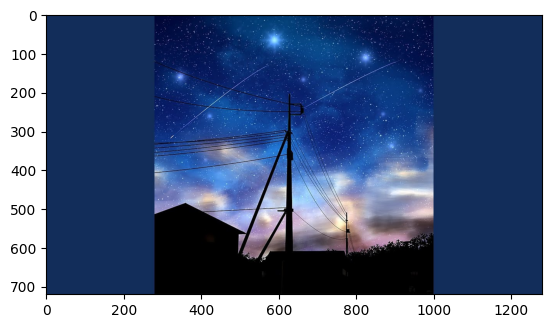

shape: (720, 1280)
shape: (28, 28)


PermissionError: [Errno 13] Permission denied: 'd:/.work/school/deep learn/'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_path='d:\.work\school\deep learn\Hui Che - Star Tea Party.jpg'
im=Image.open(img_path)
plt.imshow(im)
plt.show()
im=im.convert('L')
print('shape:',np.array(im).shape)
im=im.resize((28,28))
plt.show()
print("shape:",np.array(im).shape)
def load_image(img_path):
    im=Image.open(img_path).convert('L')
    im=im.resize((28,28))
    im=np.array(im).reshape(1,-1).astype(np.float32)
    im=1-im/255
    return im
model=MNIST()
params_file_path='d:/.work/school/deep learn/mnist.pdparams'
img_path='d:/.work/school/deep learn/'
param_dict=paddle.load(params_file_path)
model.load_dict(param_dict)
model.eval()
tensor_img = load_image(img_path)
result = model(paddle.to_tensor(tensor_img))
print('result',result)
print("test",result.numpy().astype('int32'))